# 1.4.4 Smoothing Images


## 2D Convolution(Image Filtering)

In [7]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

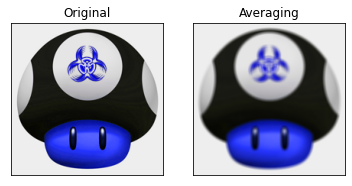

In [3]:
img = cv2.imread('1.png')
kernel = np.ones((5,5),np.float32)/25
dst = cv2.filter2D(img,-1,kernel)
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()


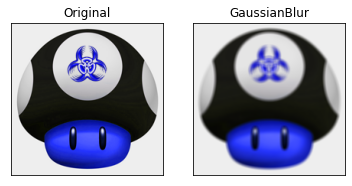

In [13]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread('1.png')
blur = cv2.GaussianBlur(img,(5,5),0)
kernel = np.ones((5,5),np.float32)/25
dst = cv2.filter2D(img,-1,kernel)
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('GaussianBlur')
plt.xticks([]), plt.yticks([])
plt.show()


## 2. Gaussian Filtering

In [5]:
blur = cv2.GaussianBlur(img,(5,5),0)

In [6]:
cv2.imshow('dst',blur)
cv2.imshow('img',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

## 3.Median Filtering

In [8]:
median = cv2.medianBlur(img,5)

In [9]:
cv2.imshow('dst',median)
cv2.imshow('img',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

## 4. Bilateral Filtering

In [10]:
blur = cv2.bilateralFilter(img,9,75,75)

In [11]:
cv2.imshow('dst',blur)
cv2.imshow('img',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Kernel Convolution

In [14]:
l=1
kernel = np.array([[0,-1,0],[-1,4,-1],[0,-1,0]],np.float32)
kernel

array([[ 0., -1.,  0.],
       [-1.,  4., -1.],
       [ 0., -1.,  0.]], dtype=float32)

In [15]:
img = np.random.randint(10, size=(12,12))
#img = np.ones((10,10),np.float32)
img

array([[1, 2, 6, 6, 1, 9, 8, 0, 0, 0, 4, 1],
       [6, 2, 1, 5, 4, 1, 6, 0, 0, 5, 9, 1],
       [6, 8, 7, 6, 5, 6, 8, 5, 9, 4, 5, 2],
       [7, 4, 4, 9, 9, 4, 2, 6, 1, 1, 9, 1],
       [8, 4, 8, 1, 3, 3, 0, 1, 5, 1, 4, 9],
       [6, 9, 3, 2, 1, 2, 0, 2, 8, 8, 5, 0],
       [8, 9, 9, 2, 0, 3, 4, 5, 2, 7, 3, 3],
       [1, 8, 1, 9, 1, 1, 6, 8, 9, 3, 5, 2],
       [3, 0, 4, 5, 1, 7, 6, 2, 8, 0, 8, 6],
       [6, 0, 0, 0, 1, 3, 4, 7, 2, 4, 1, 8],
       [2, 9, 4, 3, 9, 2, 5, 6, 8, 9, 7, 1],
       [1, 6, 9, 6, 1, 5, 3, 1, 9, 8, 5, 9]])

In [16]:
h,w=img.shape
print(h,w)

12 12


In [17]:
#[*range(-2,3)]
dst = np.zeros((h,w),np.int)


In [18]:
for i in range(l,h-l):
    for j in range(l,w-l):
        t=0
        for p in range(-l,l+1):
            for q in range(-l,l+1):
                t += kernel[p+l,q+l]*img[i+p,j+q]
        dst[i,j]=t 

In [19]:
img

array([[1, 2, 6, 6, 1, 9, 8, 0, 0, 0, 4, 1],
       [6, 2, 1, 5, 4, 1, 6, 0, 0, 5, 9, 1],
       [6, 8, 7, 6, 5, 6, 8, 5, 9, 4, 5, 2],
       [7, 4, 4, 9, 9, 4, 2, 6, 1, 1, 9, 1],
       [8, 4, 8, 1, 3, 3, 0, 1, 5, 1, 4, 9],
       [6, 9, 3, 2, 1, 2, 0, 2, 8, 8, 5, 0],
       [8, 9, 9, 2, 0, 3, 4, 5, 2, 7, 3, 3],
       [1, 8, 1, 9, 1, 1, 6, 8, 9, 3, 5, 2],
       [3, 0, 4, 5, 1, 7, 6, 2, 8, 0, 8, 6],
       [6, 0, 0, 0, 1, 3, 4, 7, 2, 4, 1, 8],
       [2, 9, 4, 3, 9, 2, 5, 6, 8, 9, 7, 1],
       [1, 6, 9, 6, 1, 5, 3, 1, 9, 8, 5, 9]])

In [20]:
dst

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,  -9, -16,   3,   4, -21,   7, -11, -14,   7,  21,   0],
       [  0,  13,   9,  -2,  -5,   6,  13,  -3,  26,  -4,  -4,   0],
       [  0,  -7, -12,  16,  15,  -4, -10,  15, -17, -11,  25,   0],
       [  0, -13,  20, -18,  -2,   3,  -6,  -9,   9, -14,  -8,   0],
       [  0,  14, -16,   1,  -3,   1,  -8,  -6,  15,  11,   5,   0],
       [  0,   2,  21, -12,  -7,   5,   2,   4, -21,  12,  -8,   0],
       [  0,  21, -26,  27,  -7, -13,   5,  10,  15,  -9,   4,   0],
       [  0, -15,  10,   6, -10,  17,   5, -21,  19, -23,  20,   0],
       [  0, -15,  -8,  -9,  -9,  -2,  -5,  14, -19,   4, -23,   0],
       [  0,  24,  -5,  -7,  29, -14,   5,   3,   6,   9,  12,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0]])

In [21]:
img = cv2.imread('lena.png', 0)

In [22]:
h,w=img.shape

In [23]:
dst = np.zeros((h-2*l,w-2*l),np.uint8)

In [24]:
for i in range(l,h-l):
    for j in range(l,w-l):
        t=0
        for p in range(-l,l+1):
            for q in range(-l,l+1):
                t += kernel[p+l,q+l]*img[i+p,j+q]
        dst[i-l,j-l]=t 

In [25]:
cv2.imshow('img',img)
cv2.imshow('dst',dst)
cv2.waitKey(0)
cv2.destroyAllWindows()